In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Load The dataset

In [ ]:
df = pd.read_csv(r'C:\Users\jay sheladiya\OneDrive\Desktop\python-libraries\Dataset\Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


checked how many null are there

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Droped the duplicates 

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Convert the totalcharges in to numeric datatype

In [7]:
df['TotalCharges'].dtype#Object(String) like " 100" , "300" , '400 '

dtype('O')

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [10]:
df['TotalCharges'].dtype

dtype('float64')

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Remove the extra space and inconsistent to the object column.

In [12]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)#l apply a function to each column of the DataFrame.


In [13]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [14]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Map the seniorcitizen column

In [15]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})


In [16]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2306,7245-NIIWQ,Female,No,No,No,3,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.85,199.85,No
428,4360-PNRQB,Male,No,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.60,1395.05,No
4303,3284-SVCRO,Female,No,Yes,No,45,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.50,1121.05,No
4475,4693-VWVBO,Female,No,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,61.05,No
4687,3647-GMGDH,Male,No,Yes,No,22,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),94.70,1914.90,Yes


Modifyed create new column

In [17]:
df['TenureGroup'] = pd.cut(df['tenure'],#is used to convert a continuous numerical column into categorical groups (bins).
                           bins=[0,12,24,48,72],
                           labels=['0-1 yr','1-2 yrs','2-4 yrs','4-6 yrs'])


In [18]:
df['ChargeGroup'] = pd.cut(df['MonthlyCharges'],
                           bins=4,
                           labels=['Low','Medium','High','Very High'])


In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargeGroup
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 yr,Low
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,2-4 yrs,Medium
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 yr,Medium
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2-4 yrs,Low
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 yr,High


Plotting 

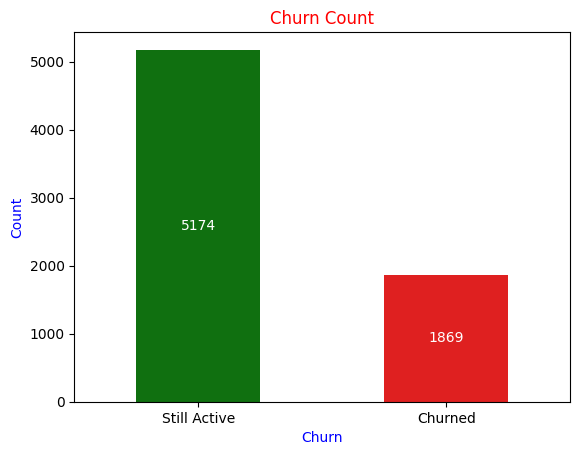

In [20]:
c = ['green','red']
a = sns.countplot(x = 'Churn',data=df , width=0.5 , palette=c , hue='Churn')
plt.xticks([0,1], ['Still Active', 'Churned'])
plt.title('Churn Count' ,  color = 'Red')
for i in a.containers:
    a.bar_label(i  , color='White' ,label_type='center' , fontsize=10)
plt.xlabel('Churn', color = 'blue')
plt.ylabel('Count', color = 'blue')
plt.show()

In [21]:
counts = df['Churn'].value_counts()


In [22]:
percentages = counts / counts.sum()


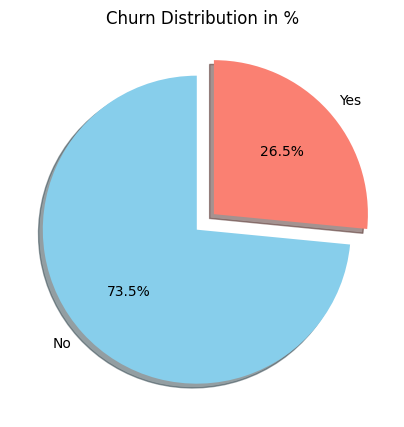

In [23]:
plt.figure(figsize=(5,5))
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values
colors = ['skyblue', 'salmon']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,startangle=90, shadow=True, explode=(0.05, 0.1))
plt.title("Churn Distribution in %" , color= '#000000')
plt.show()


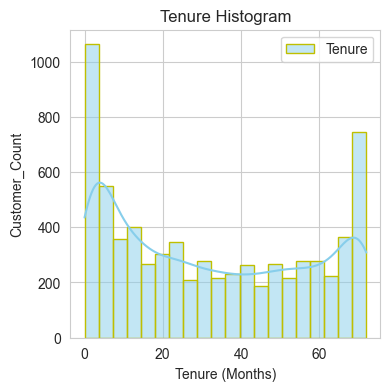

In [24]:
x = df['tenure']
plt.figure(figsize=(4,4))
sns.set_style("whitegrid")
sns.histplot(x, bins=20,kde=True,edgecolor='y', color='skyblue', label='Tenure')
plt.legend()
plt.title("Tenure Histogram")
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer_Count")
plt.show()


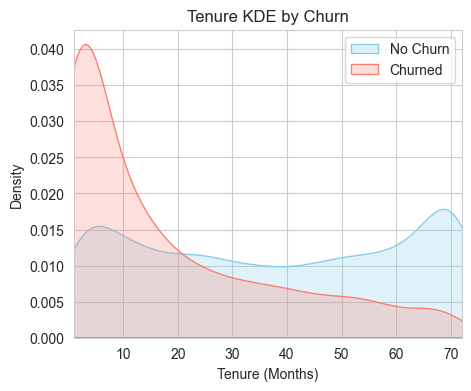

In [25]:
plt.figure(figsize=(5,4))


sns.kdeplot(
    data=df[df['Churn'] == 'No'],
    x='tenure',
    fill=True,
    label='No Churn',
    color='skyblue'
)


sns.kdeplot(
    data=df[df['Churn'] == 'Yes'],
    x='tenure',
    fill=True,
    label='Churned',
    color='salmon'
)
plt.xlim(1, df['tenure'].max())


plt.title("Tenure KDE by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Density")
plt.legend()
plt.show()


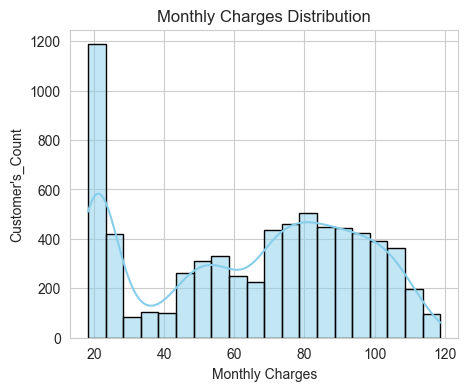

In [26]:
plt.figure(figsize=(5,4))
sns.histplot(df['MonthlyCharges'], bins=20, kde=True,
             color='skyblue', edgecolor='black')
plt.title("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Customer's_Count")
plt.show()


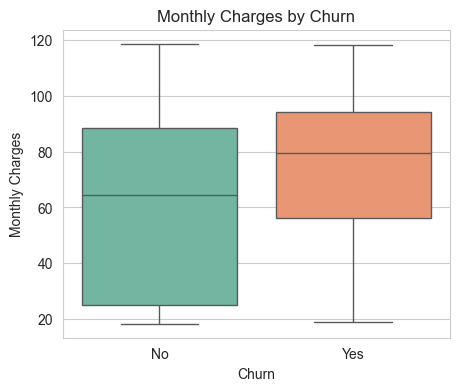

In [27]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2' , hue='Churn')
plt.title("Monthly Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


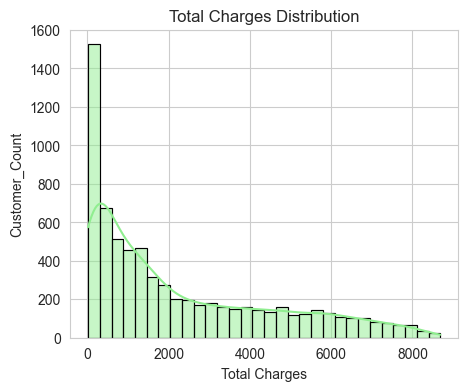

In [28]:
plt.figure(figsize=(5,4))
sns.histplot(df['TotalCharges'], bins=30, kde=True,
             color='lightgreen', edgecolor='black')
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")
plt.ylabel("Customer_Count")
plt.show()


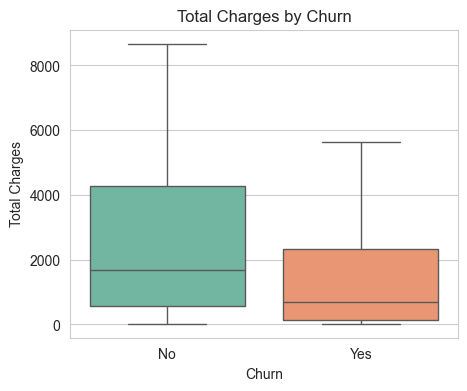

In [29]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2' , hue='Churn' , showfliers=False)
plt.title("Total Charges by Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()


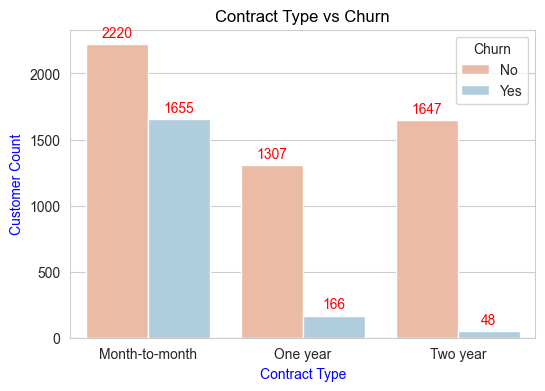

In [30]:
plt.figure(figsize=(6,4))
a = sns.countplot(x='Contract', hue='Churn', data=df, palette='RdBu' )
plt.title("Contract Type vs Churn",color='#000000')
for i in a.containers:
    a.bar_label(i  , color='Red' ,padding=3, fontsize=10)
plt.xlabel("Contract Type", color='blue')
plt.ylabel("Customer Count", color='blue')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()


In [53]:
df['customerID'].nunique()


7043

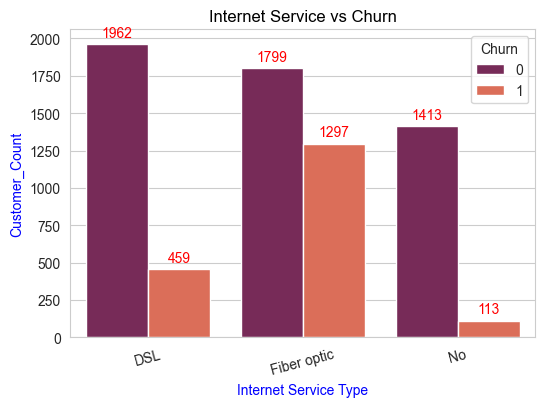

In [52]:
plt.figure(figsize=(6,4))

a = sns.countplot(x='InternetService', hue='Churn', data=df, palette='rocket')
plt.title("Internet Service vs Churn",color='#000000')
for i in a.containers:
    a.bar_label(i  , color='Red' ,padding=3, fontsize=10)
plt.xlabel("Internet Service Type" , color='blue')
plt.ylabel("Customer_Count" , color='blue')
plt.xticks([0, 1, 2], ['DSL', 'Fiber optic', 'No'], rotation=15)
plt.legend(title='Churn')

plt.show()


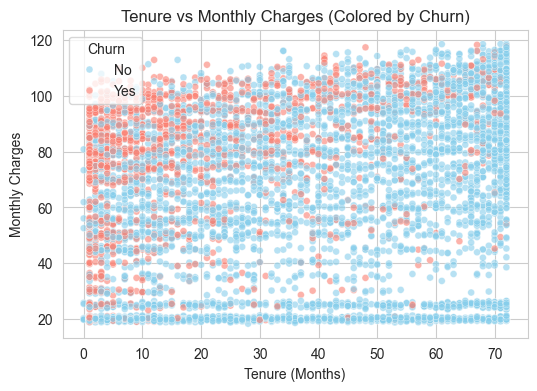

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    data=df,
    alpha=0.6,
    s=25,
    palette=['skyblue','salmon']
)
plt.title("Tenure vs Monthly Charges (Colored by Churn)")
plt.xlabel("Tenure (Months)")
plt.ylabel("Monthly Charges")
plt.show()



In [33]:
df['Churn_flag'] = df['Churn'].map({'Yes':1, 'No':0})


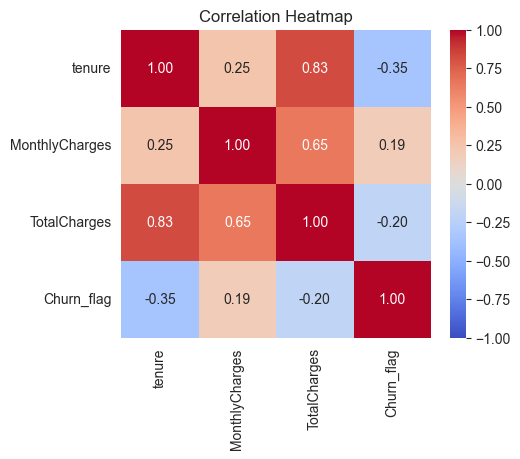

In [34]:
plt.figure(figsize=(5,4))

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_flag']
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',vmin='-1', vmax='1')

plt.title("Correlation Heatmap")
plt.show()


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   object  
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

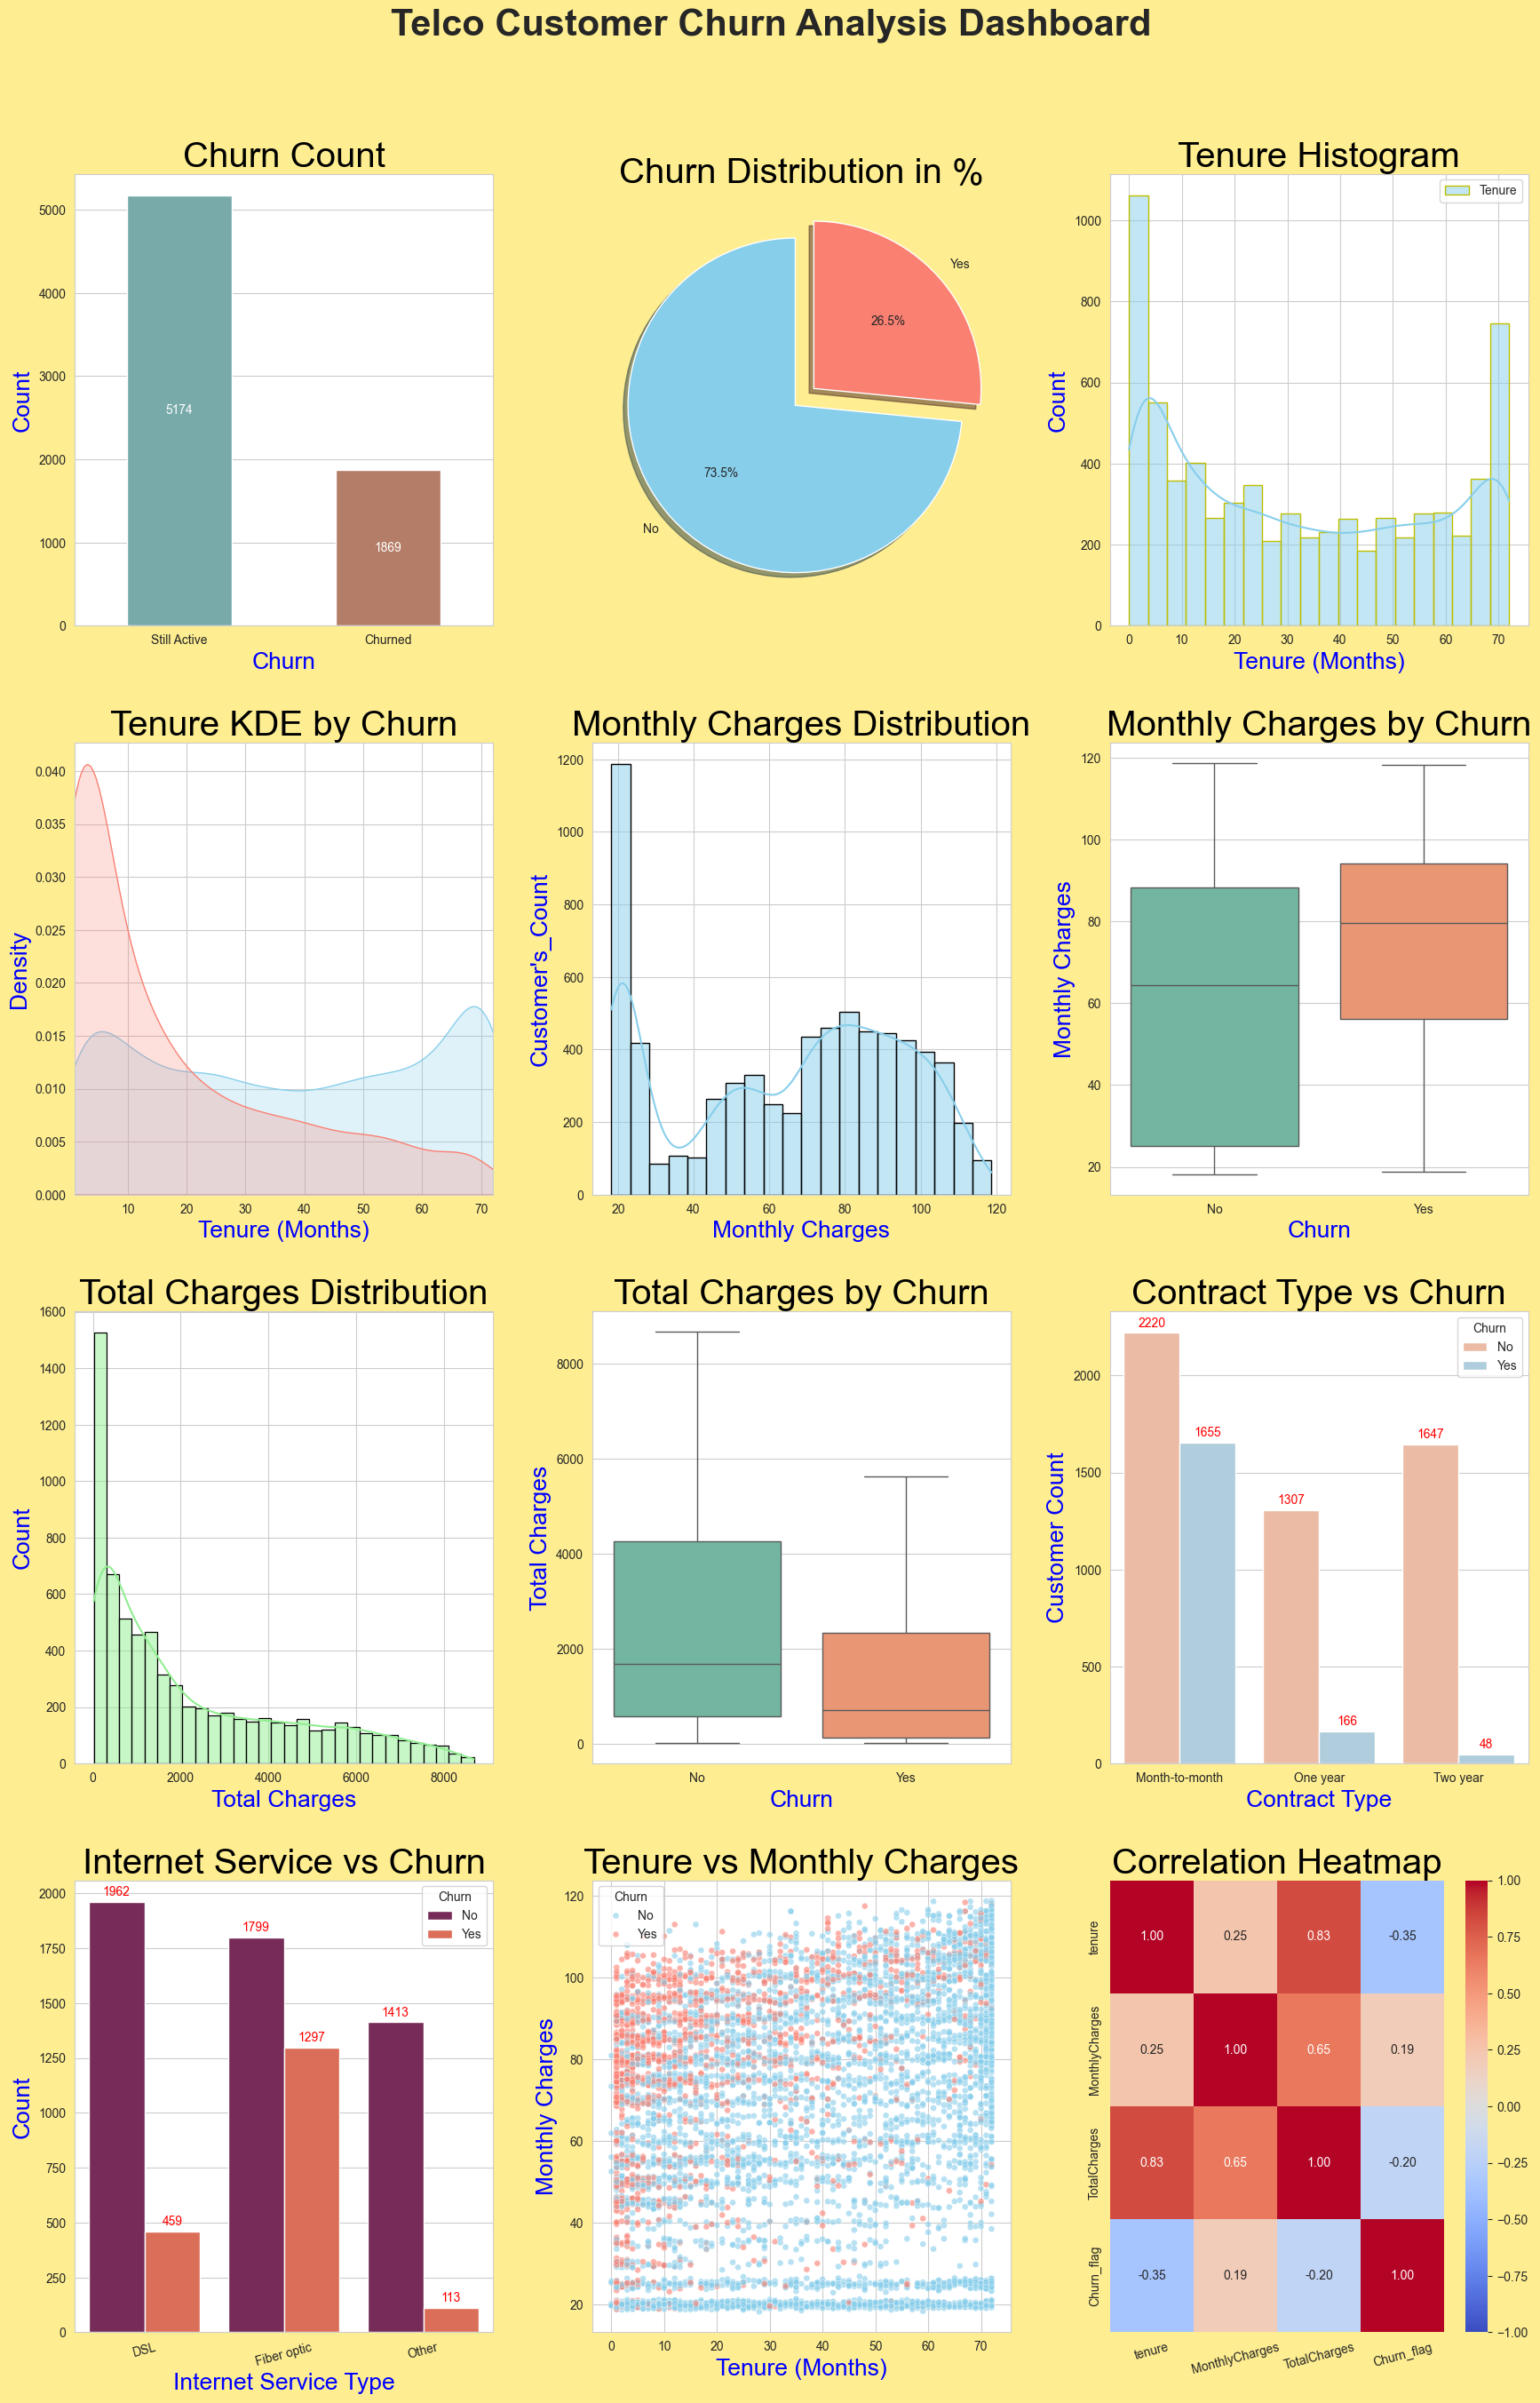

In [36]:
plt.figure(facecolor= '#FEEE91' , figsize=(18,27))

plt.suptitle("Telco Customer Churn Analysis Dashboard",
             fontsize=30, fontweight='bold', y=1.01)


# 1) Churn Count
#___________________________________________________________________________________________________________________________________

plt.subplot(4,3,1)
c = ['#70B2B2','#C1785A']
a = sns.countplot(x = 'Churn',data=df , width=0.5 , palette=c, hue='Churn')
plt.xticks([0,1], ['Still Active', 'Churned'])
plt.title('Churn Count' ,  color = '#000000',fontsize=29)
for i in a.containers:
    a.bar_label(i  , color='White' ,label_type='center' , fontsize=10)
plt.xlabel('Churn', color = 'blue', fontsize=19)
plt.ylabel('Count', color = 'blue', fontsize=19)

# 2) Churn Pie
#_____________________________________________________________________________________________________________________________________

plt.subplot(4,3,2)
labels = df['Churn'].value_counts().index
sizes = df['Churn'].value_counts().values
colors = ['skyblue', 'salmon']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,startangle=90, shadow=True, explode=(0.05, 0.1))
plt.title("Churn Distribution in %" , color= '#000000', fontsize=29)


# 3) Tenure Histogram
#______________________________________________________________________________________________________________________________________

plt.subplot(4,3,3)
x = df['tenure']
sns.set_style("whitegrid")
sns.histplot(x, bins=20,kde=True,edgecolor='y', color='skyblue', label='Tenure')
plt.legend()
plt.title("Tenure Histogram" , fontsize=29 , color='#000000')
plt.xlabel("Tenure (Months)" , fontsize=19 , color='blue')
plt.ylabel("Count", fontsize=19 , color='blue')

# 4) Tenure KDE by Churn
#________________________________________________________________________________________________________________________________________

plt.subplot(4,3,4)
sns.kdeplot(
    data=df[df['Churn'] == 'No'],
    x='tenure',
    fill=True,
    label='No Churn',
    color='skyblue'
)
sns.kdeplot(
    data=df[df['Churn'] == 'Yes'],
    x='tenure',
    fill=True,
    label='Churned',
    color='salmon'
)
plt.xlim(1, df['tenure'].max())
plt.title("Tenure KDE by Churn" , fontsize=29 , color='#000000')
plt.xlabel("Tenure (Months)", fontsize=19 , color='blue')
plt.ylabel("Density", fontsize=19 , color='blue')


# 5) MonthlyCharges Histogram + KDE
#______________________________________________________________________________________________________________________________________

plt.subplot(4,3,5)
sns.histplot(df['MonthlyCharges'], bins=20, kde=True,
             color='skyblue', edgecolor='black')
plt.title("Monthly Charges Distribution",fontsize=29,color='#000000')
plt.xlabel("Monthly Charges", fontsize=19 , color='blue')
plt.ylabel("Customer's_Count", fontsize=19 , color='blue')

# 6) MonthlyCharges Boxplot by Churn
#_______________________________________________________________________________________________________________________________________

plt.subplot(4,3,6)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2' , hue='Churn')
plt.title("Monthly Charges by Churn",fontsize=29,color='#000000')
plt.xlabel("Churn", fontsize=19 , color='blue')
plt.ylabel("Monthly Charges", fontsize=19 , color='blue')

# 7) TotalCharges Histogram
#_______________________________________________________________________________________________________________________________________

plt.subplot(4,3,7)
sns.histplot(df['TotalCharges'], bins=30, kde=True,
             color='lightgreen', edgecolor='black')
plt.title("Total Charges Distribution",fontsize=29,color='#000000')
plt.xlabel("Total Charges", fontsize=19 , color='blue')
plt.ylabel("Count", fontsize=19 , color='blue')

# 8) TotalCharges Boxplot by Churn (IQR Outliers Removed)
#_______________________________________________________________________________________________________________________________________

plt.subplot(4,3,8)
# q1 = df['TotalCharges'].quantile(0.25)
# q3 = df['TotalCharges'].quantile(0.75)
# IQR = round(q3-q1)

# lower_limit = q1-0.5*IQR
# upper_limit = q3+0.5*IQR

# outlier = df[(df['TotalCharges']>upper_limit)|(df['TotalCharges']<lower_limit)]


# df = df[(df['TotalCharges']>lower_limit)&(df['TotalCharges']<upper_limit)]

sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2' , hue='Churn' , showfliers=False)
plt.title("Total Charges by Churn",fontsize=29,color='#000000')
plt.xlabel("Churn", fontsize=19 , color='blue')
plt.ylabel("Total Charges", fontsize=19 , color='blue')

# 9) Contract vs Churn
#______________________________________________________________________________________________________________________________________

plt.subplot(4,3,9)
a = sns.countplot(x='Contract', hue='Churn', data=df, palette='RdBu' )
plt.title("Contract Type vs Churn",fontsize=29,color='#000000')
for i in a.containers:
    a.bar_label(i  , color='Red' ,padding=3, fontsize=10)
plt.xlabel("Contract Type", fontsize=19 , color='blue')
plt.ylabel("Customer Count", fontsize=19 , color='blue')
plt.xticks(rotation=0)
plt.legend(title='Churn')

# 10) InternetService vs Churn
#______________________________________________________________________________________________________________________________________

plt.subplot(4,3,10)
a = sns.countplot(x='InternetService', hue='Churn', data=df, palette='rocket')
plt.title("Internet Service vs Churn",fontsize=29,color='#000000')
for i in a.containers:
    a.bar_label(i  , color='Red' ,padding=3, fontsize=10)
plt.xlabel("Internet Service Type", fontsize=19 , color='blue')
plt.ylabel("Count", fontsize=19 , color='blue')
plt.xticks([0, 1, 2], ['DSL', 'Fiber optic', 'Other'], rotation=15)
plt.legend(title='Churn')

# 11) Scatter: Tenure vs MonthlyCharges
#______________________________________________________________________________________________________________________________________

plt.subplot(4,3,11)
sns.scatterplot(
    x='tenure',
    y='MonthlyCharges',
    hue='Churn',
    data=df,
    alpha=0.6,
    s=25,
    palette=['skyblue','salmon']
)
plt.title("Tenure vs Monthly Charges",fontsize=29,color='#000000')
plt.xlabel("Tenure (Months)", fontsize=19 , color='blue')
plt.ylabel("Monthly Charges", fontsize=19 , color='blue')

# 12) Correlation Heatmap
#______________________________________________________________________________________________________________________________________

plt.subplot(4,3,12)
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_flag']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin='-1', vmax='1')
plt.title("Correlation Heatmap",fontsize=29,color='#000000')
plt.xticks(rotation=15)


plt.tight_layout(pad=3.0)

In [37]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [38]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [39]:
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [40]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']


In [41]:
X = pd.get_dummies(X, drop_first=True)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70, random_state=2)


In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


c:\Users\jay sheladiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
y_pred = model.predict(X_test)


In [45]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score

print("Accuracy:", 100*accuracy_score(y_test, y_pred))


Accuracy: 100.0


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[55  0]
 [ 0 15]]


In [ ]:
import joblib

joblib.dump(model, 'churn_model.pkl')
joblib.dump(X.columns, 'model_columns.pkl')


['model_columns.pkl']